In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.power as smp

females = np.array([2474, 2547, 2830, 3219, 3429, 3448, 3677, 3872, 4001, 4116]) 

print('Mean is:', np.mean(females))

print('Variance is:', np.var(females,ddof=1))

print('Standard deviation is:', np.std(females, ddof=1))

Mean is: 3361.3
Variance is: 344920.4555555556
Standard deviation is: 587.2992895922449


In [2]:
males = np.array([ 2844, 2863, 2963, 3239, 3379, 3449, 3582, 3926, 4151, 4356])

print('Mean is:', np.mean(males))

print('Variance is:', np.var(males,ddof=1))

print('Standard deviation is:', np.std(males, ddof=1))

Mean is: 3475.2
Variance is: 283158.1777777777
Standard deviation is: 532.1260919911537


In [3]:
n = 10
p = 0.25

print('np =', n*p)

np = 2.5


**Q1 (lower quartile)**

The samllest highest integer after 2.5 is 3. So we look at: $$x_(3)$$

which is 2830. 

So Q1 = 2830

**Q2 (median)**

In [25]:

percentiles_custom = np.percentile(females, [0,25,50,75,100], method='averaged_inverted_cdf')
print(f"Custom Method Percentiles for females: {percentiles_custom}")

percentiles_custom = np.percentile(males, [0,25,50,75,100], method='averaged_inverted_cdf')
print(f"Custom Method Percentiles for males: {percentiles_custom}")



Custom Method Percentiles for females: [2474.  2830.  3438.5 3872.  4116. ]
Custom Method Percentiles for males: [2844. 2963. 3414. 3926. 4356.]


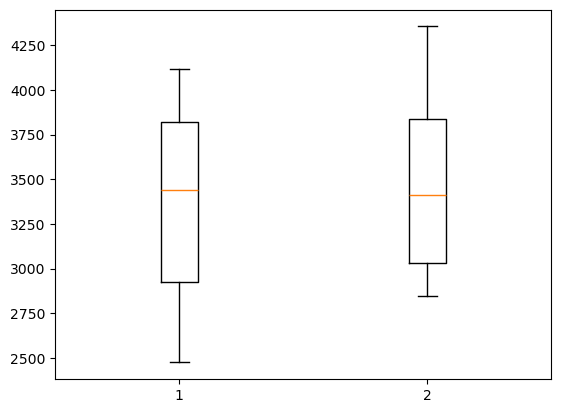

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.boxplot([females, males])
plt.show()


In [6]:
#Custom Method Percentiles for females: [2474.  2830.  3438.5 3872.  4116. ]
#Custom Method Percentiles for males: [2844. 2963. 3414. 3926. 4356.]

print(1.5 * (3872-2830))

print(1.5 * (3926-2963))

1563.0
1444.5


As the modified box plot is the default choice in Python, and no individual observations are seen beyond the whiskers, there are no extreme observations (which by the way is defined as an observation further than 1.5 · IQR) away from the box.

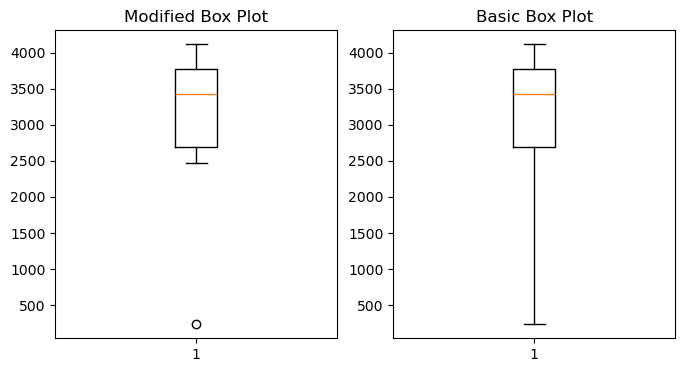

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
females_with_outlier = np.append(females, [235])

# Default whiskers
ax1.boxplot(females_with_outlier)
ax1.set_title("Modified Box Plot")

# Whiskers covering 100% of the data
ax2.boxplot(females_with_outlier, whis=(0, 100))
ax2.set_title("Basic Box Plot")

plt.show()

The coefficient of variation (CV) is the standard deviation seen relative to the mean, thus for the females it is

$$CV_females = \frac{s_x}{\bar{x}} * 100\text{\%} = 17.5\text{\%} $$

and for males is

$$CV_males = \frac{s_y}{\bar{y}} * 100\text{\%} = 17.5\text{\%} $$

Mean is: 3475.2
Variance is: 283158.1777777777
Standard deviation is: 532.1260919911537

Mean is: 3361.3
Variance is: 344920.4555555556
Standard deviation is: 587.2992895922449

In [8]:
print('CV (female) =', (587.2993 / 3361.3) * 100,'%')

print('CV (male) =', (532.1261 / 3475.2) * 100,'%')

CV (female) = 17.472385684110314 %
CV (male) = 15.312100023020255 %


1.2 exercise

In [9]:
total = np.array([-3, 0, 2, 4, 7, 10,12])

print('Median is:', np.median(total))

Median is: 4.0


In [10]:
totaal = np.array([32,33,39,42,43,28,34])

print('The quartiles are', np.percentile(totaal, [0,25,50,75,100], method='averaged_inverted_cdf'))

The quartiles are [28. 32. 34. 42. 43.]


We look at Q3 (42) and Q1(32) in the tabel

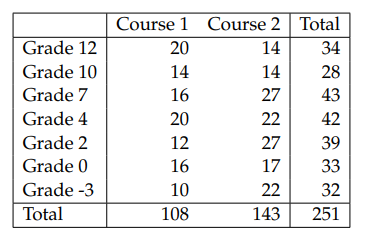

In [11]:
IQR = 4-(-3)
print(IQR)

7


1.3

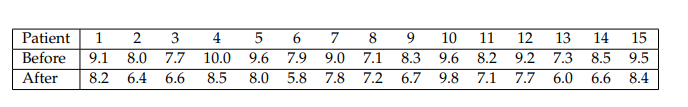

In [12]:
before = np.array([9.1, 8.0, 7.7, 10.0, 9.6, 7.9, 9.0, 7.1, 8.3, 9.6,
8.2, 9.2, 7.3, 8.5, 9.5])

after = np.array([8.2, 6.4, 6.6, 8.5, 8.0, 5.8, 7.8, 7.2, 6.7, 9.8,
7.1, 7.7, 6.0, 6.6, 8.4])

before_sorted = np.sort(before)
after_sorted = np.sort(after)

print('Median of the cholesterol measurements for the patients before treatment', np.median(before_sorted))
print('Median of the cholesterol measurements for the patients after treatment', np.median(after_sorted) )

Median of the cholesterol measurements for the patients before treatment 8.5
Median of the cholesterol measurements for the patients after treatment 7.2


In [13]:
print('STD of the cholesterol measurements for the patients before treatment', np.std(before_sorted, ddof=1))
print('STD of the cholesterol measurements for the patients after treatment', np.std(after_sorted, ddof=1) )


STD of the cholesterol measurements for the patients before treatment 0.9023778112773575
STD of the cholesterol measurements for the patients after treatment 1.0901288696209053


Or we could use pandas

In [14]:
import pandas as pd
import numpy as np
before_series = pd.Series(before)
after_series = pd.Series(after)

print(before_series.describe())

count    15.000000
mean      8.600000
std       0.902378
min       7.100000
25%       7.950000
50%       8.500000
75%       9.350000
max      10.000000
dtype: float64


In [15]:
print(after_series.describe())

count    15.000000
mean      7.386667
std       1.090129
min       5.800000
25%       6.600000
50%       7.200000
75%       8.100000
max       9.800000
dtype: float64


In [16]:
patients = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])


# Calculate the covariance matrix
cov_matrix = np.cov(before, after)

# Extract the covariance value
sample_covariance = cov_matrix[0, 1]

print('Sample Covariance:', sample_covariance)


Sample Covariance: 0.7964285714285714


In [17]:
# Calculate the covariance matrix
cov_matrix = np.corrcoef(before, after)

# Extract the covariance value
sample_correlation = cov_matrix[0, 1]

print('Sample Covariance:', sample_correlation)

Sample Covariance: 0.809618797174745


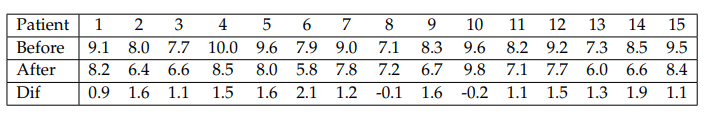

[-2.1 -1.6 -1.3 -1.1  0.2]
0.4098095238095241
0.6401636695482836


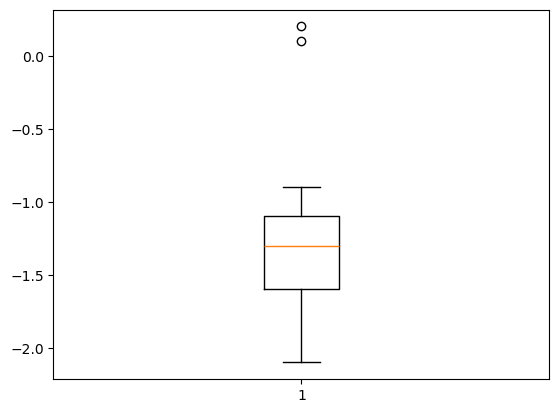

In [18]:
## Analysis of differences
dif = after-before
## Quartiles
quartiles_dif = np.quantile(dif,[0,0.25,0.5,0.75,1],method ='averaged_inverted_cdf')
print(quartiles_dif)

## Sample variance
print(np.var(dif, ddof=1))

## Sample standard deviation
print(np.std(dif, ddof=1))

## Boxplot
fig = plt.boxplot(dif)
plt.show()

The mean effect (decrease of cholesterol due to treatment) would be estimated at 1.2 nMol/l. 

But clearly there is also a high degree of differences in what the effect is: the standard deviation of (all) the differences is 0.64. 

Looking at the boxplot, we find two patients with values identified as extreme, which from the data table is seen to be patient no 8 and 10. 

The better way, maybe, here to tell the story would be the following: for 2 out of 15 patients (13% of patients) the treatment clearly had no effect. 

For the remaining 13 out of 15 (87% of patients) the treatment had the following average effect and standard deviation (recomputing the mean and standard deviation for the 13 patients):

In [19]:
## Analysis of 13 non-extreme differences
## Take out observation 8 and 10
dif13 = np.delete(dif,[7,9])
## Mean of the 13 differences
print(np.mean(dif13))

## Standard deviation of the 13 differences
print(np.std(dif13, ddof=1))


-1.4230769230769231
0.3467800603500874


In the previous question we were studying the differences in the attempt to answer this question. One could also, as we did initially look at the data separately, and e.g. supplement by the grouped boxplot:

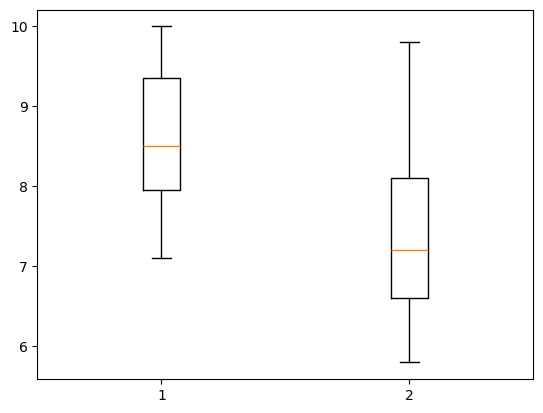

In [20]:
fig = plt.boxplot([before,after])
plt.show()


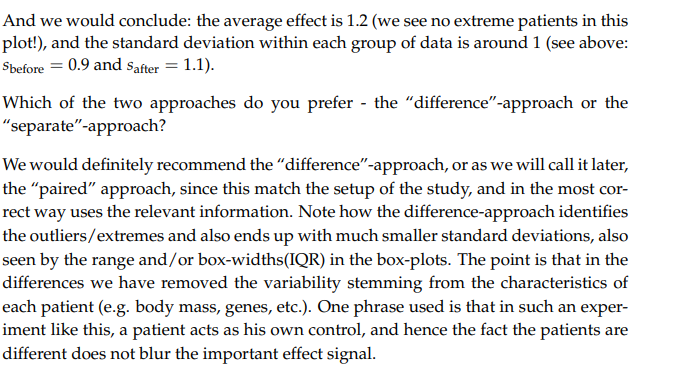